In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target, = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [8]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
   1/1500 [..............................] - ETA: 4:34 - loss: 2.3090 - accuracy: 0.0938

2023-03-04 23:18:08.856875: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 11s 7ms/step - loss: 0.5140 - accuracy: 0.8155 - val_loss: 0.3245 - val_accuracy: 0.8817
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3372 - accuracy: 0.8796 - val_loss: 0.2638 - val_accuracy: 0.9014
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2901 - accuracy: 0.8950 - val_loss: 0.2591 - val_accuracy: 0.9031
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2589 - accuracy: 0.9050 - val_loss: 0.2403 - val_accuracy: 0.9097
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2361 - accuracy: 0.9135 - val_loss: 0.2306 - val_accuracy: 0.9143
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2164 - accuracy: 0.9196 - val_loss: 0.2282 - val_accuracy: 0.9154
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2005 - accuracy: 0.9268 - val_loss: 0.2359 - val_accuracy: 0.9

<function matplotlib.pyplot.show(close=None, block=None)>

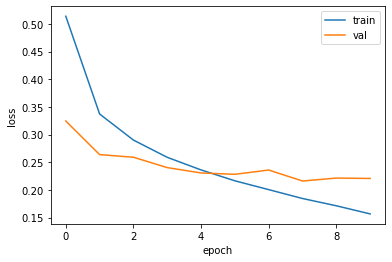

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2161 - accuracy: 0.9208


[0.21605008840560913, 0.9207500219345093]

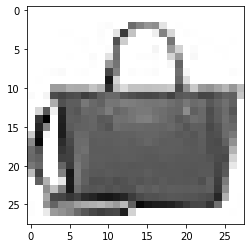

In [13]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [14]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 53ms/step
[[5.5958954e-17 4.0736865e-23 8.1481240e-19 1.1482859e-17 8.2299500e-16
  3.9237829e-18 1.4003676e-15 1.3002201e-18 1.0000000e+00 7.8740894e-19]]


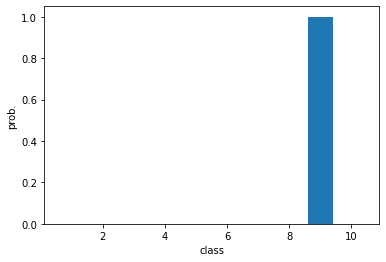

In [15]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [16]:
classes = ['T-shirt', 'Pant', 'Sweater', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle boots']

In [17]:
import numpy as np
print(classes[np.argmax(preds)])

Bag


In [18]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [19]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2348 - accuracy: 0.9174


[0.23479719460010529, 0.9174000024795532]